#  Hypothesis: 
Using Machine Learning to Predict Temperature Trends in South Carolina Using Historical Climate Data

-> Machine Learning can be used to Predict Temperature Trends in South Carolina Using Historical Climate Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os

def split_data_by_month(file_path, output_dir):
    df = pd.read_csv(file_path, parse_dates=['DATE'])
    df['Month'] = df['DATE'].dt.month
    
    os.makedirs(output_dir, exist_ok=True)
    
    for month in range(1, 13):
        month_df = df[df['Month'] == month]
        if not month_df.empty:
            output_file = os.path.join(output_dir, f"{os.path.basename(file_path).split('.')[0]}_Month_{month}.csv")
            month_df.to_csv(output_file, index=False)
            print(f"Saved: {output_file}")

# Where testing and training files are located
train_file = "X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ML/MLData/SC_Monthly_train.csv"
test_file = "X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ML/MLData/SC_Monthly_test.csv"

# Output directories ofr testing and training files
train_output_dir = "X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ML/MLData/SC_MoreData_Train"
test_output_dir = "X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ML/MLData/SC_MoreData_Test"


split_data_by_month(train_file, train_output_dir)
split_data_by_month(test_file, test_output_dir)


Saved: X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ML/MLData/SC_MoreData_Train\SC_Monthly_train_Month_1.csv
Saved: X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ML/MLData/SC_MoreData_Train\SC_Monthly_train_Month_2.csv
Saved: X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ML/MLData/SC_MoreData_Train\SC_Monthly_train_Month_3.csv
Saved: X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ML/MLData/SC_MoreData_Train\SC_Monthly_train_Month_4.csv
Saved: X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ML/MLData/SC_MoreData_Train\SC_Monthly_train_Month_5.csv
Saved: X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ML/MLData/SC_MoreData_Train\SC_Monthly_train_Month_6.csv
Saved: X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ML/MLData/SC_MoreData_Train\SC_Monthly_train_Month_7.csv
Saved:

In [3]:
# this is the directory where monthly files are stored
train_dir = "X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ML/MLData/SC_MoreData_Train"

# this dictionary stores dfs for each month
monthly_dfs = {}

# each month's csv file is loaded into a df
for month in range(1, 13):
    file_path = f"{train_dir}/SC_Monthly_train_Month_{month}.csv"
    monthly_dfs[month] = pd.read_csv(file_path)

# show the first few rows of march data
print(monthly_dfs[3].head())

       STATION        DATE  ADPT  ASLP  ASTP  AWBT   AWND  RHAV  SNOW  SNWD  \
0  USW00013880  2000-03-01   NaN   NaN   NaN   NaN   8.50   NaN   0.0   0.0   
1  USW00013880  2000-03-02   NaN   NaN   NaN   NaN   8.28   NaN   0.0   0.0   
2  USW00013880  2000-03-03   NaN   NaN   NaN   NaN   6.49   NaN   0.0   0.0   
3  USW00013880  2000-03-04   NaN   NaN   NaN   NaN  10.29   NaN   0.0   0.0   
4  USW00013880  2000-03-05   NaN   NaN   NaN   NaN   5.14   NaN   0.0   0.0   

   TAVG  Month  
0  61.0      3  
1  62.0      3  
2  55.0      3  
3  61.0      3  
4  57.0      3  


In [4]:
# this is the directory where monthly test files are stored
test_dir = "X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ML/MLData/SC_MoreData_Test"

# this dictionary stores testv dfs for each month
mtest_dfs = {}

# Load each month's CSV file into a DataFrame
for month in range(1, 13):
    file_path1 = f"{test_dir}/SC_Monthly_test_Month_{month}.csv"
    mtest_dfs[month] = pd.read_csv(file_path1)

# show the first few rows of december test data
print(mtest_dfs[12].head())

       STATION        DATE  ADPT  ASLP  ASTP  AWBT   AWND  RHAV  SNOW  SNWD  \
0  USW00013880  2024-12-01   NaN   NaN   NaN   NaN   2.01   NaN   0.0   0.0   
1  USW00013880  2024-12-02   NaN   NaN   NaN   NaN   4.70   NaN   0.0   0.0   
2  USW00013880  2024-12-03   NaN   NaN   NaN   NaN   8.50   NaN   0.0   0.0   
3  USW00013880  2024-12-04   NaN   NaN   NaN   NaN   4.70   NaN   0.0   0.0   
4  USW00013880  2024-12-05   NaN   NaN   NaN   NaN  12.08   NaN   0.0   0.0   

   TAVG  Month  
0   NaN     12  
1   NaN     12  
2   NaN     12  
3   NaN     12  
4   NaN     12  


In [5]:


# Display the percentage of missing values for each month
def check_missing_values(monthly_dfs):
    missing_values = {}
    
    for month, df in monthly_dfs.items():
        missing_percentage = df.isnull().sum() / len(df) * 100
        missing_values[month] = missing_percentage
    
    return pd.DataFrame(missing_values)


missing_df = check_missing_values(monthly_dfs)
print(missing_df)


                1          2          3          4          5          6   \
STATION   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
DATE      0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
ADPT     28.779176  32.461435  27.920332  27.854977  27.956463  27.853535   
ASLP     28.999145  32.582160  27.956989  27.892875  28.078757  27.979798   
ASTP     28.999145  32.582160  27.956989  27.892875  28.078757  27.979798   
AWBT     28.779176  32.461435  27.920332  27.854977  27.956463  27.853535   
AWND      2.444091   2.709591   2.712610   2.539161   2.421426   2.348485   
RHAV     27.324942  32.045607  27.639296  27.627590  27.393910  27.436869   
SNOW     43.174875  43.152247  43.255132  43.153108  45.407851  45.454545   
SNWD     43.150434  43.152247  43.255132  43.153108  45.407851  45.454545   
TAVG     52.022486  51.549296  51.967253  49.646286  49.749297  49.684343   
Month     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

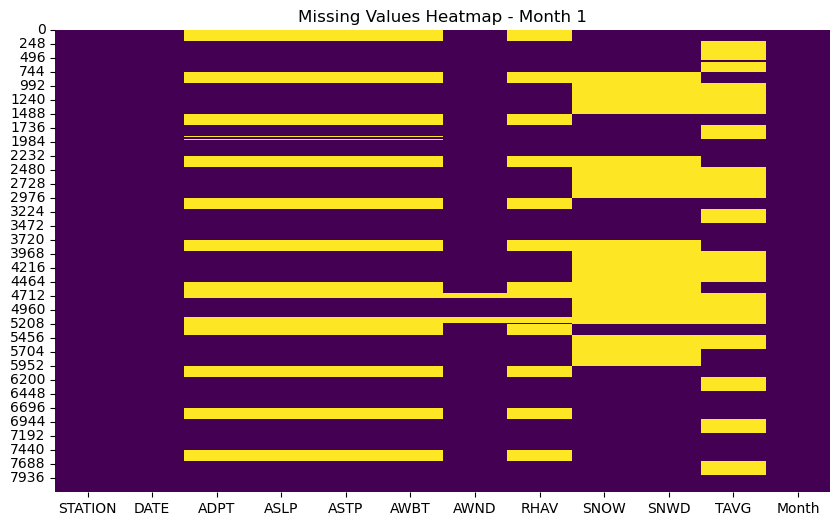

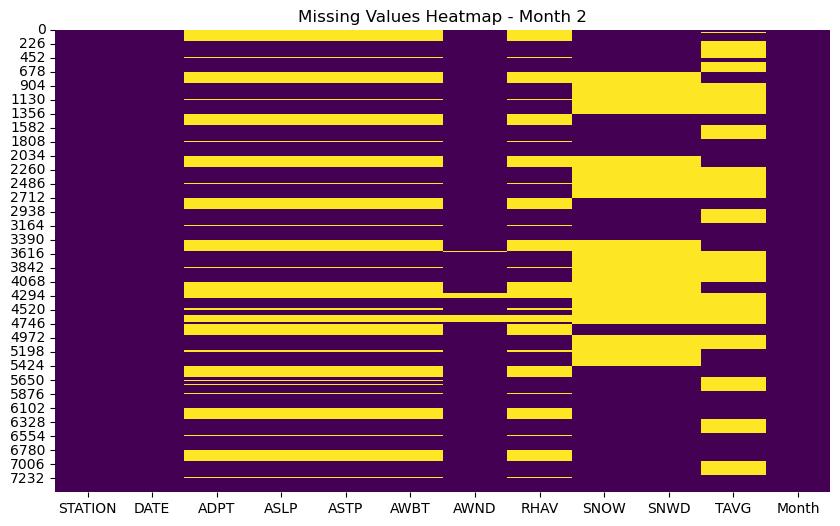

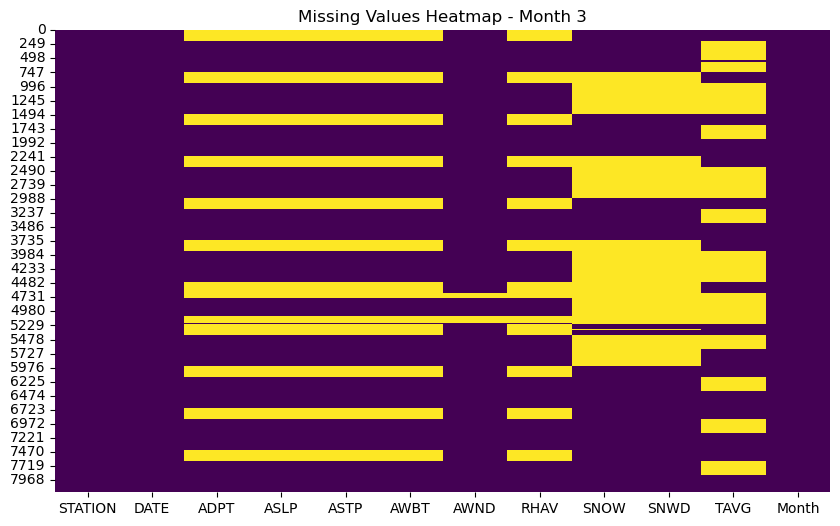

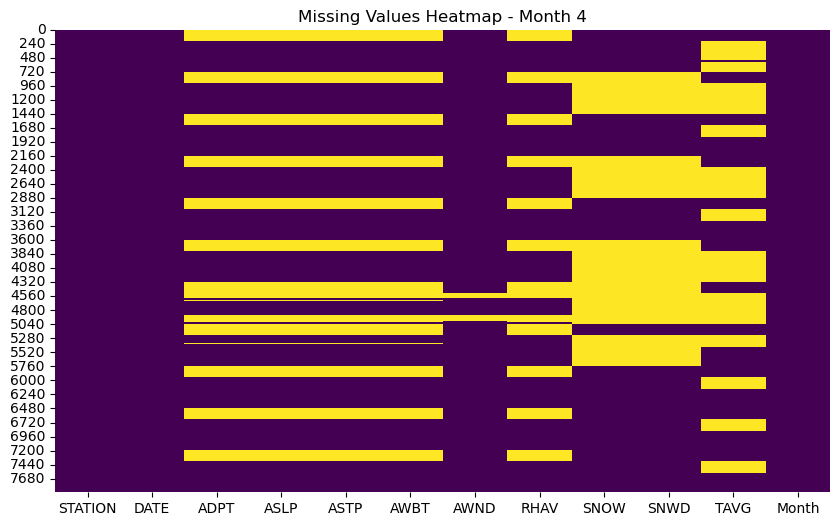

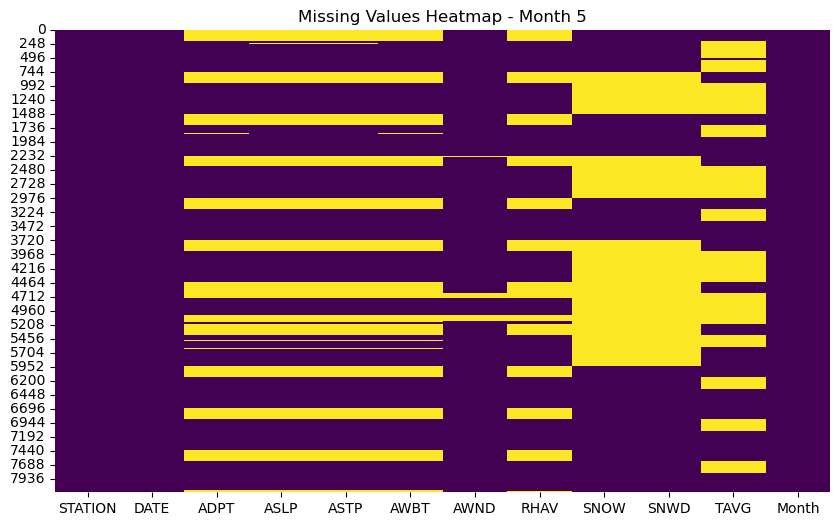

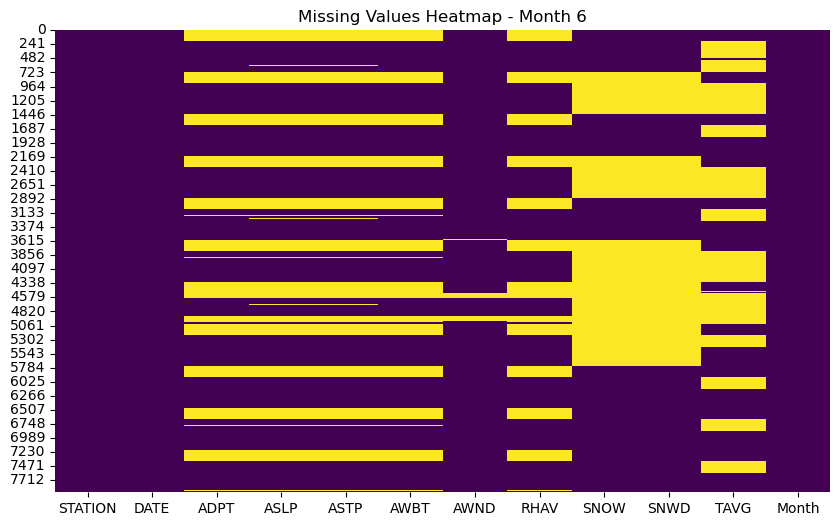

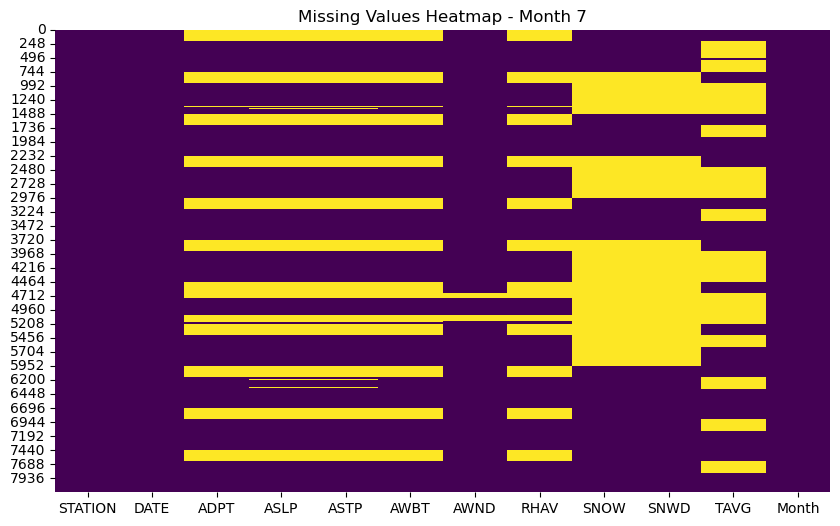

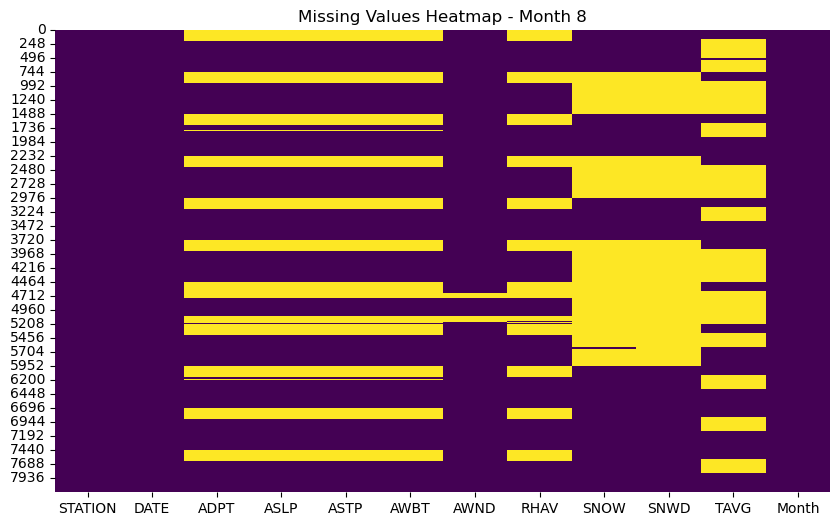

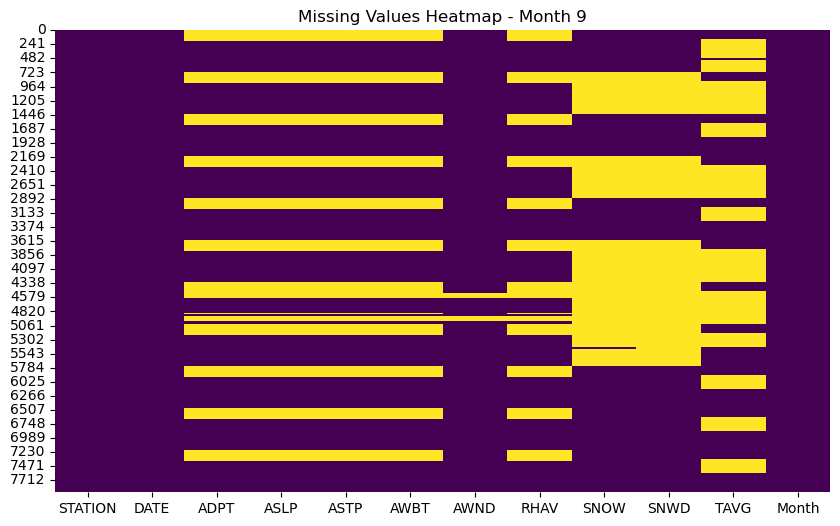

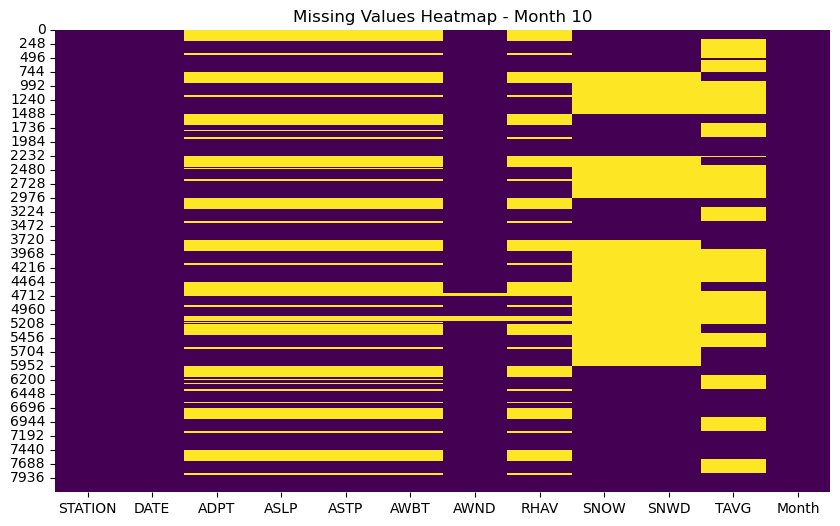

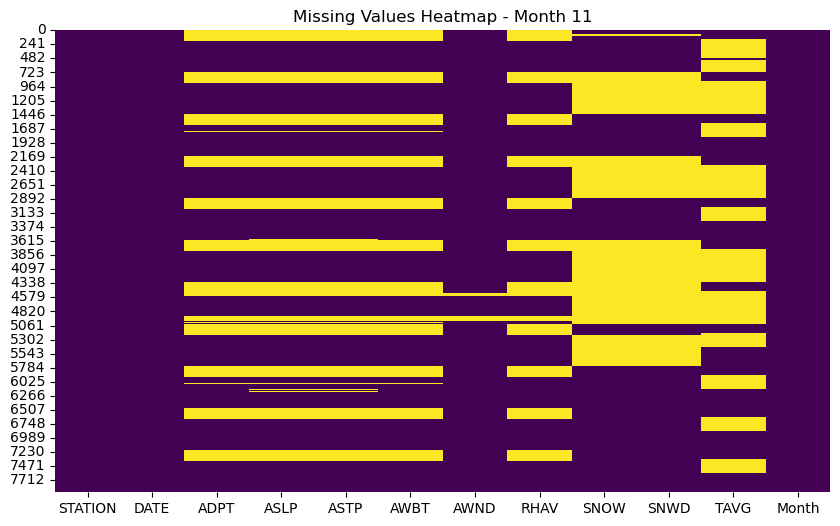

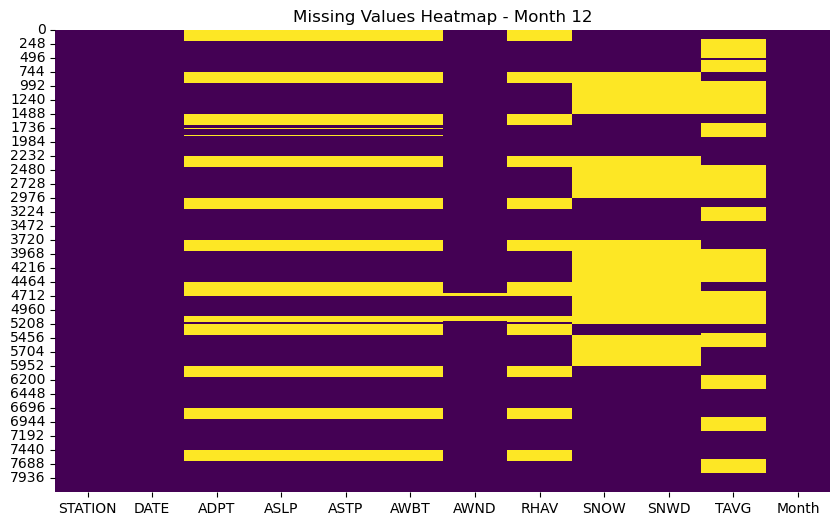

In [6]:
# create heat maps to show the percentage of missing values for each month for training data

def plot_missing_values_heatmap(df, month):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
    plt.title(f"Missing Values Heatmap - Month {month}")
    plt.show()

for month, df in monthly_dfs.items():
    plot_missing_values_heatmap(df, month)


In [7]:
# Fiunction to apply KNN Imputation for each month

from sklearn.impute import KNNImputer
def impute_knn(df):
    imputer = KNNImputer(n_neighbors=5) 
    df.iloc[:, 2:] = imputer.fit_transform(df.iloc[:, 2:])  # Skip 'STATION' and 'DATE' columns as they're non-numerical
    return df

for month in range(1, 13):
    monthly_dfs[month] = impute_knn(monthly_dfs[month])
    
# Check if missing values have been  filled for december
print(monthly_dfs[12].isnull().sum())  

STATION    0
DATE       0
ADPT       0
ASLP       0
ASTP       0
AWBT       0
AWND       0
RHAV       0
SNOW       0
SNWD       0
TAVG       0
Month      0
dtype: int64


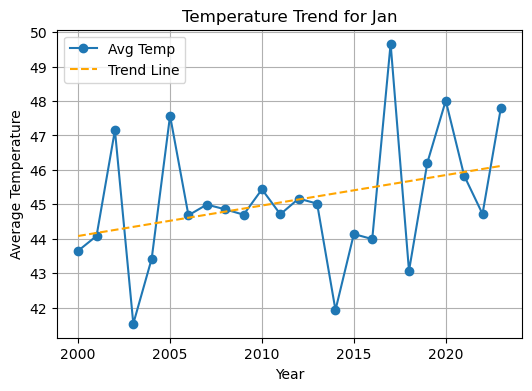

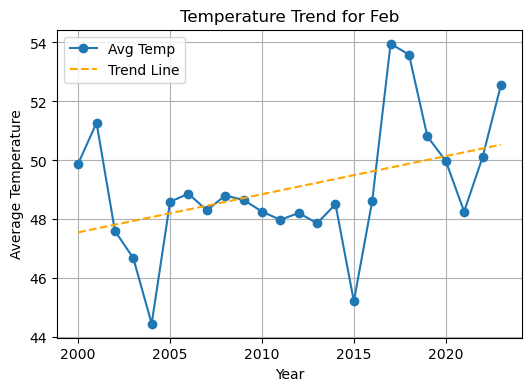

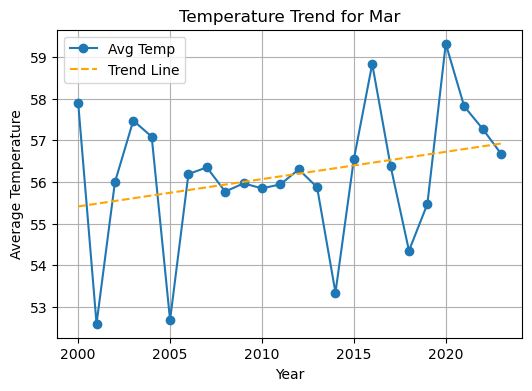

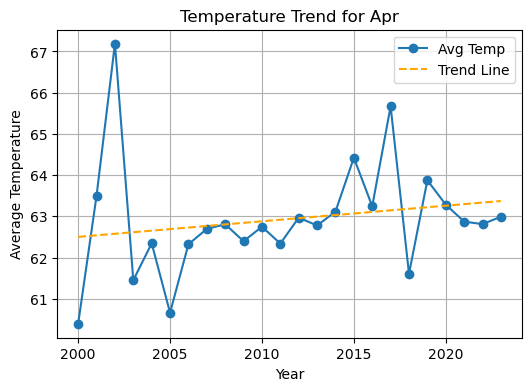

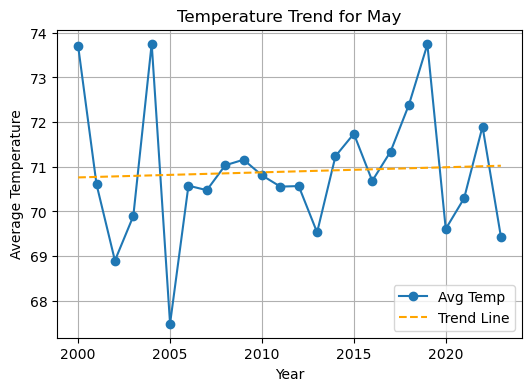

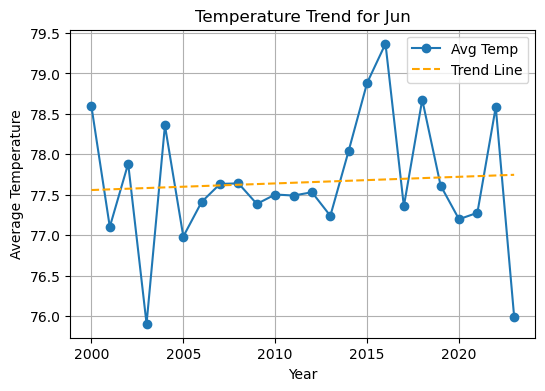

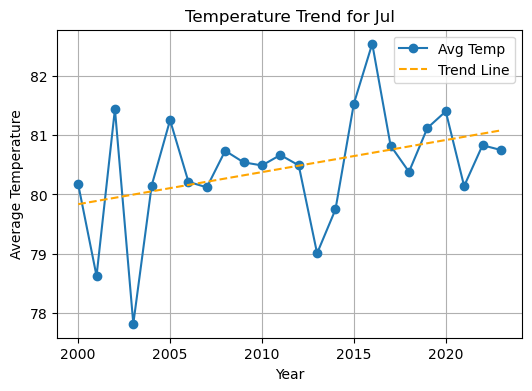

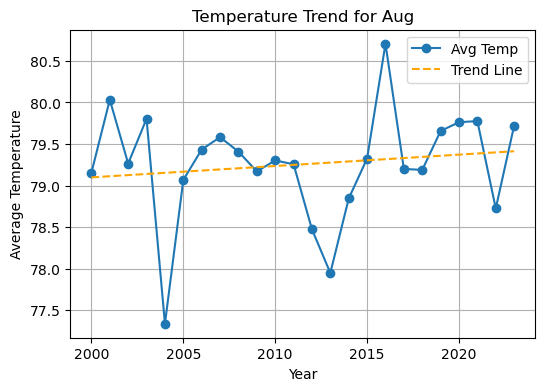

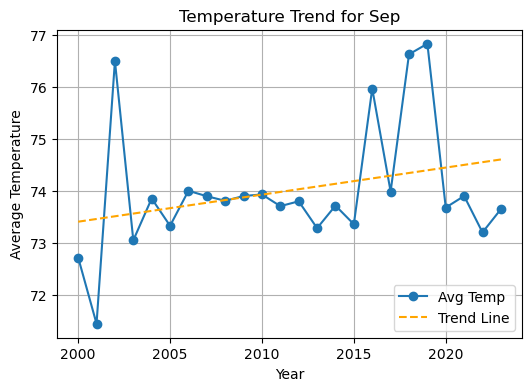

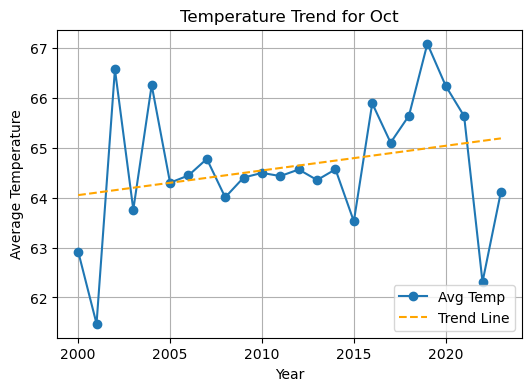

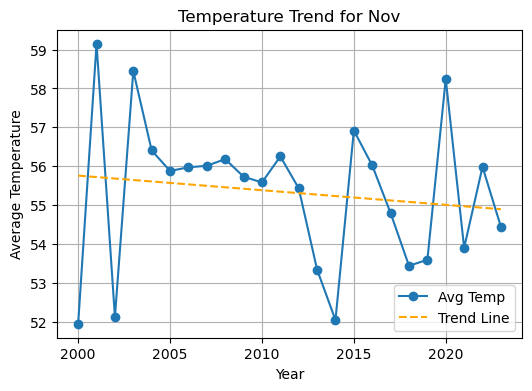

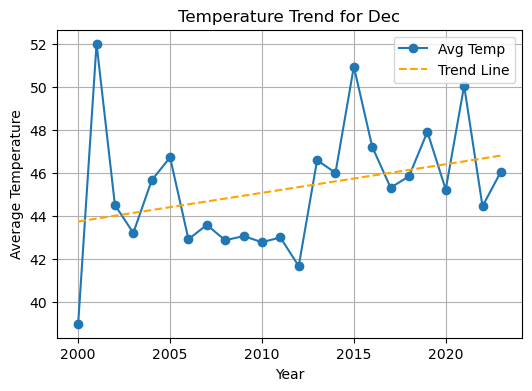

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dfs = [monthly_dfs[i] for i in range(1, 13)]
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

for i, df in enumerate(dfs):
    df['DATE'] = pd.to_datetime(df['DATE'])  # Convert date tp datetime format

    monthly_avg = df.groupby(df['DATE'].dt.year)['TAVG'].mean()
    
    # Create figure
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-', label='Avg Temp')

    # Optional: Add a trend line
    trend = pd.Series(monthly_avg.index)
    z = np.polyfit(trend, monthly_avg.values, 1)  # Fit linear trend
    p = np.poly1d(z)
    ax.plot(monthly_avg.index, p(monthly_avg.index), linestyle='--', color='orange', label='Trend Line')

    ax.set_xlabel("Year")
    ax.set_ylabel("Average Temperature")
    ax.set_title(f"Temperature Trend for {month_names[i]}")
    ax.grid(True)
    ax.legend()
    plt.show()



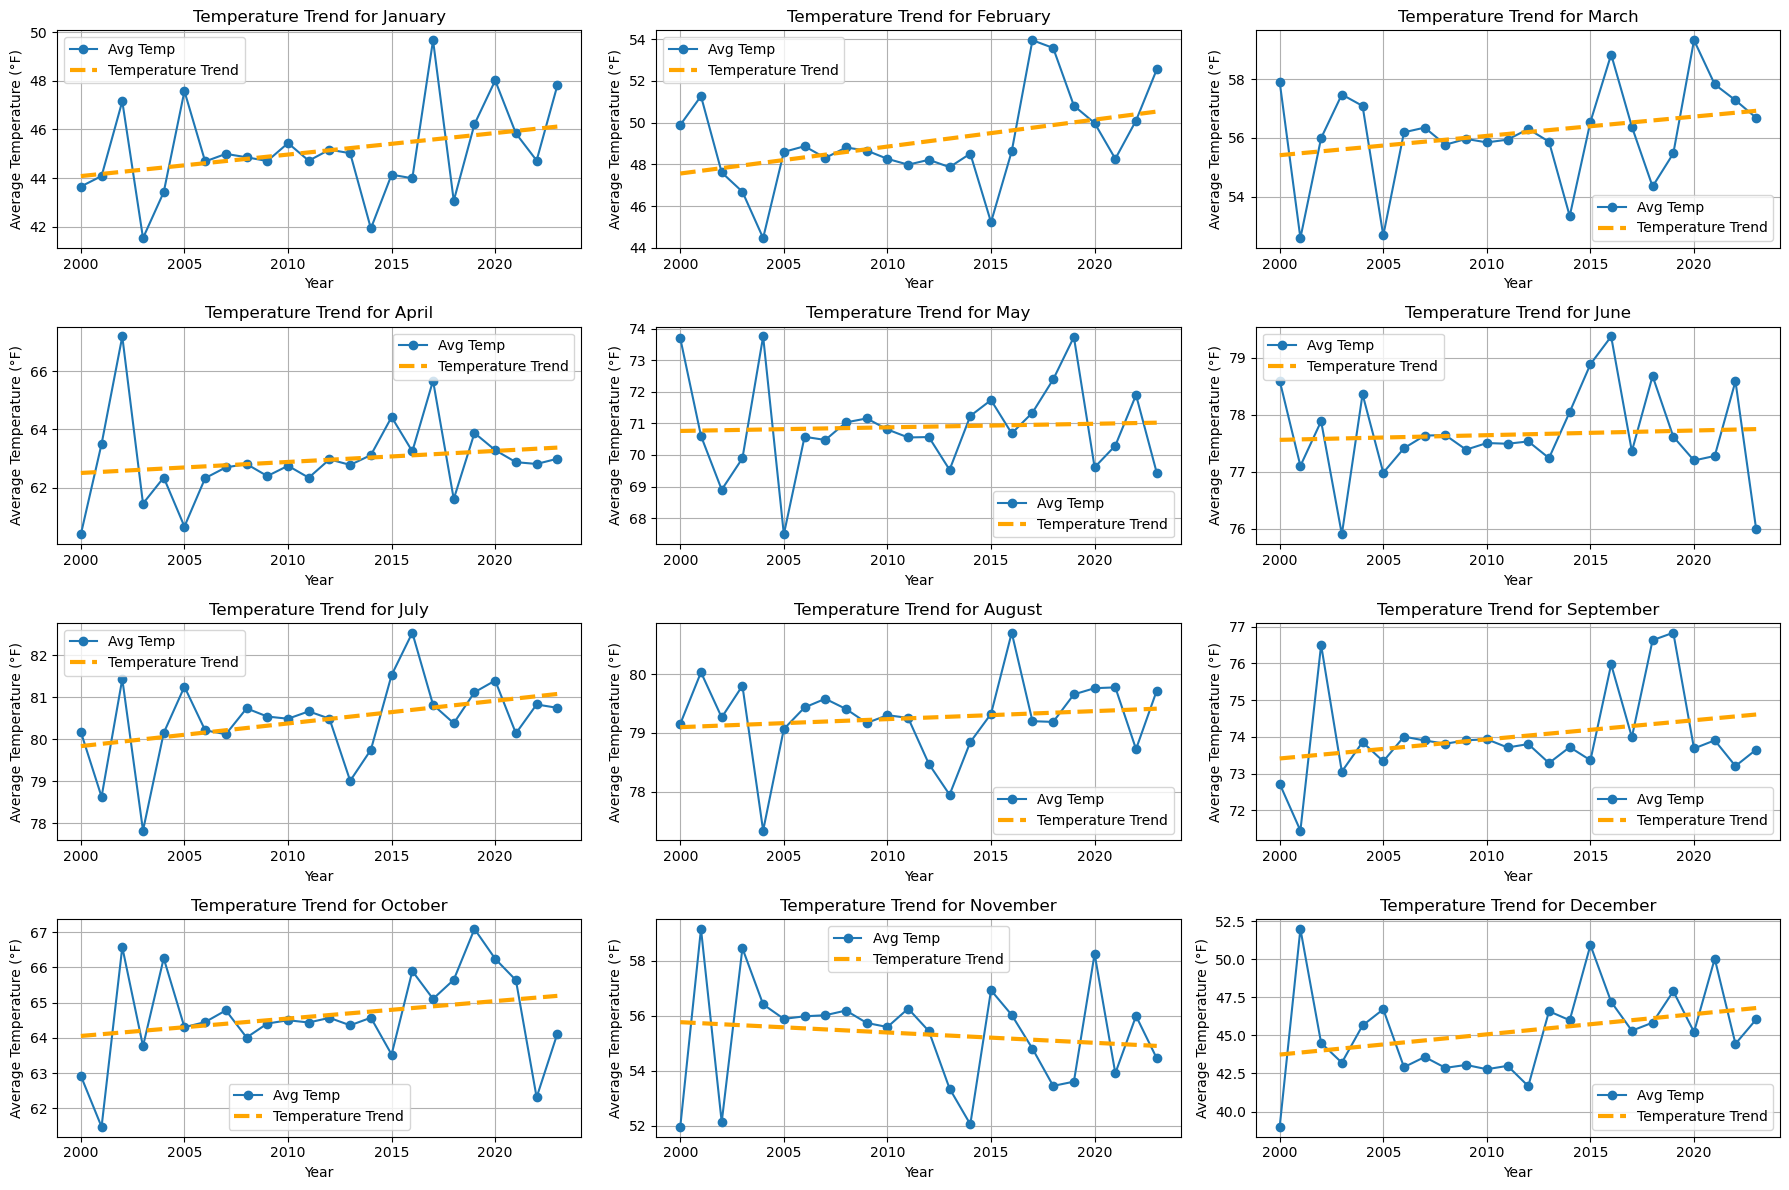

In [9]:
# make subplots for better layout 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dfs = [monthly_dfs[i] for i in range(1, 13)]
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Set up a 3-column layout
fig, axes = plt.subplots(4, 3, figsize=(18, 12))  
axes = axes.flatten() 

for i, df in enumerate(dfs):
    df['DATE'] = pd.to_datetime(df['DATE'])  # Ensure date is in datetime format
    monthly_avg = df.groupby(df['DATE'].dt.year)['TAVG'].mean()

    ax = axes[i]
    ax.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-', label='Avg Temp')

    # Add treadlines
    trend = pd.Series(monthly_avg.index)
    z = np.polyfit(trend, monthly_avg.values, 1) 
    p = np.poly1d(z)
    ax.plot(monthly_avg.index, p(monthly_avg.index), linestyle='--', linewidth=3, color='orange', label='Temperature Trend')

    ax.set_xlabel("Year")
    ax.set_ylabel("Average Temperature (°F)")
    ax.set_title(f"Temperature Trend for {month_names[i]}")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


In [10]:
## linear regression for 12 months seperaely

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# make a dictionary to store results for each month
results = {}

for month in range(1, 13):
    df_month = monthly_dfs[month].dropna()

    # Ensure 'DATE' is in datetime format
    df_month['DATE'] = pd.to_datetime(df_month['DATE'])

    # Define features (X) and target variable (y)
    X = df_month.drop(['TAVG', 'STATION', 'DATE'], axis=1)
    y = df_month['TAVG']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    # Train a linear regression Model
    regr = LinearRegression()
    regr.fit(X_train, y_train)

    # Make predictions
    y_train_pred = regr.predict(X_train)
    y_test_pred = regr.predict(X_test)

    # Calculate r2 and mse
    train_r2 = r2_score(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Store results in a dictionary
    results[month] = {
        "Train R²": train_r2,
        "Train MSE": train_mse,
        "Test R²": test_r2,
        "Test MSE": test_mse
    }

    # Print results for each month
    print(f"Month {month}:")
    print(f"  Train R²: {train_r2:.4f} | Train MSE: {train_mse:.4f}")
    print(f"  Test  R²: {test_r2:.4f} | Test  MSE: {test_mse:.4f}")
    print("-" * 40)



Month 1:
  Train R²: 0.1205 | Train MSE: 57.5643
  Test  R²: 0.1370 | Test  MSE: 58.6717
----------------------------------------
Month 2:
  Train R²: 0.1742 | Train MSE: 42.2753
  Test  R²: 0.1583 | Test  MSE: 41.1423
----------------------------------------
Month 3:
  Train R²: 0.1345 | Train MSE: 41.8408
  Test  R²: 0.1384 | Test  MSE: 42.9558
----------------------------------------
Month 4:
  Train R²: 0.1307 | Train MSE: 30.6000
  Test  R²: 0.1359 | Test  MSE: 31.1397
----------------------------------------
Month 5:
  Train R²: 0.1215 | Train MSE: 26.1337
  Test  R²: 0.1149 | Test  MSE: 27.0874
----------------------------------------
Month 6:
  Train R²: 0.1182 | Train MSE: 11.0777
  Test  R²: 0.1067 | Test  MSE: 9.6800
----------------------------------------
Month 7:
  Train R²: 0.0698 | Train MSE: 18.6746
  Test  R²: 0.0507 | Test  MSE: 22.6708
----------------------------------------
Month 8:
  Train R²: 0.0720 | Train MSE: 12.2626
  Test  R²: 0.1235 | Test  MSE: 8.2583
---

### Compute isolation forest to improive accuracy by removing outliers

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import IsolationForest  # Import Isolation Forest

# Dictionary to store results for each month
results = {}

# Iterate through months (1 to 12)
for month in range(1, 13):
    # Select the month's data and drop NaN values
    df_month = monthly_dfs[month].dropna()

    # Ensure 'DATE' is in datetime format
    df_month['DATE'] = pd.to_datetime(df_month['DATE'])
    
    # Define features (X) and target variable (y)
    X = df_month.drop(['TAVG', 'STATION', 'DATE'], axis=1)
    y = df_month['TAVG']

    # Fit Isolation Forest
    iso_forest = IsolationForest(contamination=0.05, random_state=42) 
    outliers = iso_forest.fit_predict(X)

    # Remove outliers
    mask = outliers == 1  # Keep only inliers which have a value of 1
    X_clean, y_clean = X[mask], y[mask]

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.20, random_state=42)

    # Train Linear Regression Model
    regr = LinearRegression()
    regr.fit(X_train, y_train)

    y_train_pred = regr.predict(X_train)
    y_test_pred = regr.predict(X_test)

    train_r2 = r2_score(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    results[month] = {
        "Train R²": train_r2,
        "Train MSE": train_mse,
        "Test R²": test_r2,
        "Test MSE": test_mse
    }

    # Print results for each month
    print(f"Month {month}:")
    print(f"  Train R²: {train_r2:.4f} | Train MSE: {train_mse:.4f}")
    print(f"  Test  R²: {test_r2:.4f} | Test  MSE: {test_mse:.4f}")
    print("-" * 40)


Month 1:
  Train R²: 0.1082 | Train MSE: 55.7024
  Test  R²: 0.1177 | Test  MSE: 57.5361
----------------------------------------
Month 2:
  Train R²: 0.1650 | Train MSE: 40.5301
  Test  R²: 0.1572 | Test  MSE: 41.4046
----------------------------------------
Month 3:
  Train R²: 0.1194 | Train MSE: 41.5697
  Test  R²: 0.1363 | Test  MSE: 40.8531
----------------------------------------
Month 4:
  Train R²: 0.1136 | Train MSE: 30.0530
  Test  R²: 0.0982 | Test  MSE: 30.1049
----------------------------------------
Month 5:
  Train R²: 0.1007 | Train MSE: 24.7238
  Test  R²: 0.0693 | Test  MSE: 30.1885
----------------------------------------
Month 6:
  Train R²: 0.0982 | Train MSE: 11.2181
  Test  R²: 0.0955 | Test  MSE: 8.6483
----------------------------------------
Month 7:
  Train R²: 0.0522 | Train MSE: 20.1594
  Test  R²: 0.0757 | Test  MSE: 18.3875
----------------------------------------
Month 8:
  Train R²: 0.0564 | Train MSE: 12.0851
  Test  R²: 0.0799 | Test  MSE: 9.2522
---

## Linear regression model with plots

NameError: name 'Splt' is not defined

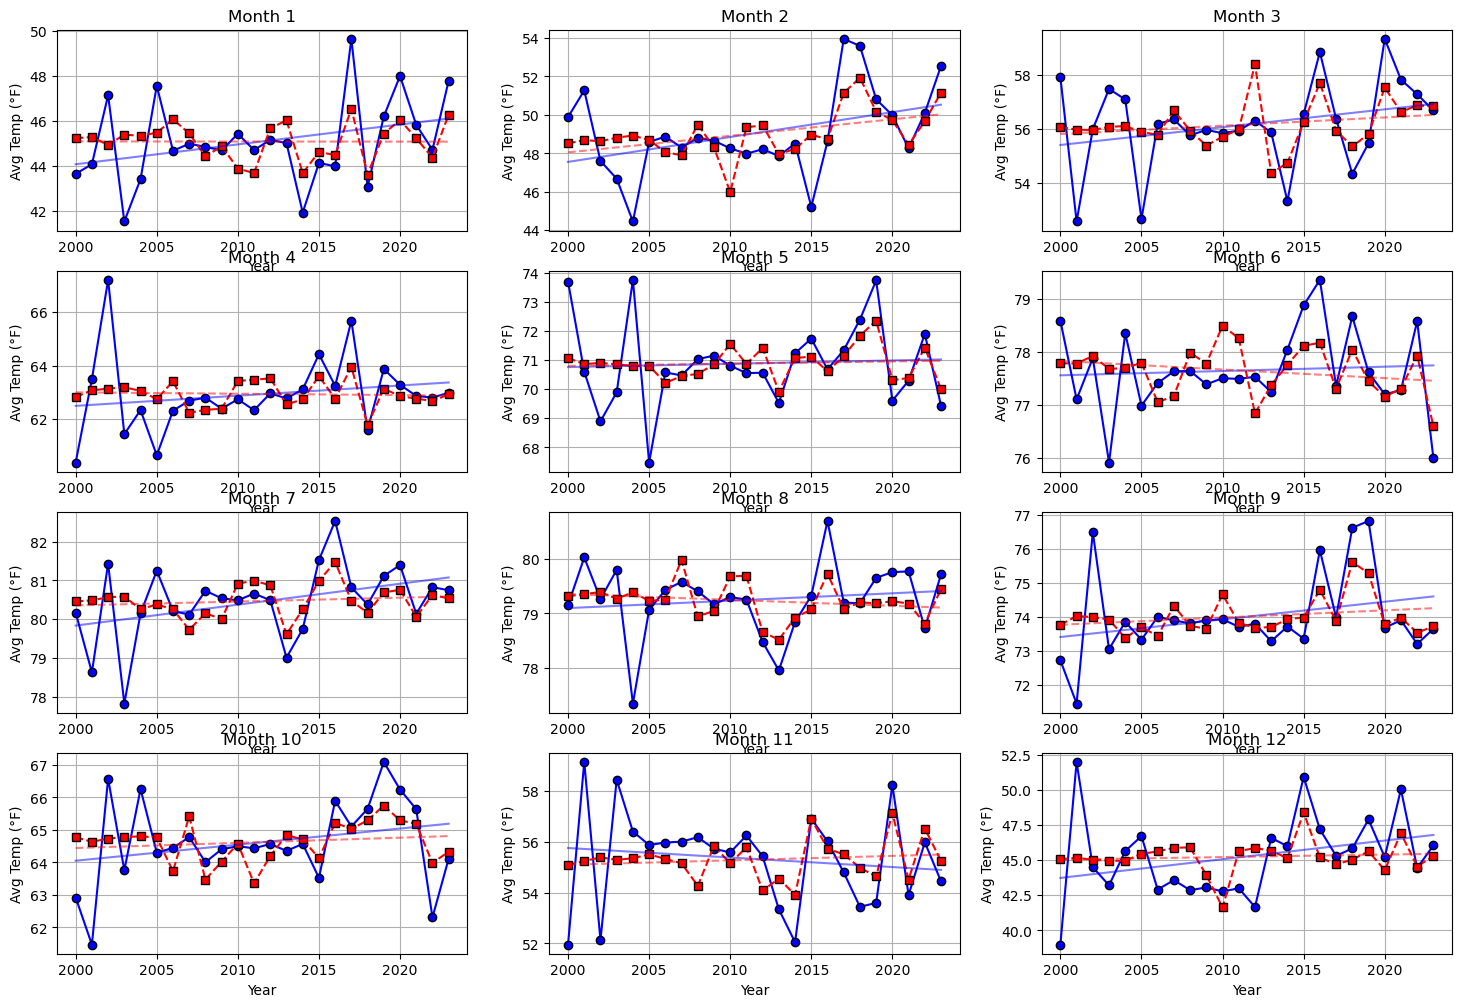

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

monthly_results = {}

fig, axes = plt.subplots(4, 3, figsize=(18, 12)) 
axes = axes.flatten() 

for i, month in enumerate(range(1, 13)):
    df_month = monthly_dfs[month].dropna().copy()
    df_month['DATE'] = pd.to_datetime(df_month['DATE'])

    X = df_month.drop(['TAVG', 'STATION', 'DATE'], axis=1)
    y = df_month['TAVG']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    regr = LinearRegression()
    regr.fit(X_train, y_train)

    df_month['Predicted_TAVG'] = regr.predict(X)

    df_month['Year'] = df_month['DATE'].dt.year
    actual_avg = df_month.groupby('Year')['TAVG'].mean()
    predicted_avg = df_month.groupby('Year')['Predicted_TAVG'].mean()

    monthly_results[month] = (actual_avg, predicted_avg)

    ax = axes[i]
    ax.plot(actual_avg.index, actual_avg.values, marker='o', linestyle='-', markersize=6, markeredgecolor='black', label='Actual Avg Temp', color='blue')
    ax.plot(predicted_avg.index, predicted_avg.values, marker='s', linestyle='--', markersize=6, markeredgecolor='black', label='Predicted Avg Temp', color='red')

    z_actual = np.polyfit(actual_avg.index, actual_avg.values, 1)
    p_actual = np.poly1d(z_actual)
    ax.plot(actual_avg.index, p_actual(actual_avg.index), linestyle='-', color='blue', alpha=0.5, label='Actual Trend')

    z_pred = np.polyfit(predicted_avg.index, predicted_avg.values, 1)
    p_pred = np.poly1d(z_pred)
    ax.plot(predicted_avg.index, p_pred(predicted_avg.index), linestyle='--', color='red', alpha=0.5, label='Predicted Trend')

    ax.set_xlabel("Year")
    ax.set_ylabel("Avg Temp (°F)")
    ax.set_title(f"Month {month}")

    ax.grid(True)
    #ax.legend()

Splt.tight_layout()
plt.show()


## Random forest regression model with plots


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

monthly_results = {}

# A 3-column layout
fig, axes = plt.subplots(4, 3, figsize=(18, 12))  
axes = axes.flatten() 

for i, month in enumerate(range(1, 13)):
    df_month = monthly_dfs[month].dropna().copy()
    df_month['DATE'] = pd.to_datetime(df_month['DATE'])

    X = df_month.drop(['TAVG', 'STATION', 'DATE'], axis=1)
    y = df_month['TAVG']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    regr = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
    regr.fit(X_train, y_train)

    df_month['Predicted_TAVG'] = regr.predict(X)

    df_month['Year'] = df_month['DATE'].dt.year
    actual_avg = df_month.groupby('Year')['TAVG'].mean()
    predicted_avg = df_month.groupby('Year')['Predicted_TAVG'].mean()

    monthly_results[month] = (actual_avg, predicted_avg)

    ax = axes[i]
    ax.plot(actual_avg.index, actual_avg.values, marker='o', linestyle='-', markersize=6, markeredgecolor='black', label='Actual Avg Temp', color='blue')
    ax.plot(predicted_avg.index, predicted_avg.values, marker='s', linestyle='--', markersize=6, markeredgecolor='black', label='Predicted Avg Temp', color='red')

    z_actual = np.polyfit(actual_avg.index, actual_avg.values, 1)
    p_actual = np.poly1d(z_actual)
    ax.plot(actual_avg.index, p_actual(actual_avg.index), linestyle='-', color='blue', alpha=0.5, label='Actual Trend')

    z_pred = np.polyfit(predicted_avg.index, predicted_avg.values, 1)
    p_pred = np.poly1d(z_pred)
    ax.plot(predicted_avg.index, p_pred(predicted_avg.index), linestyle='--', color='red', alpha=0.5, label='Predicted Trend')

    ax.set_xlabel("Year")
    ax.set_ylabel("Avg Temp (°F)")
    ax.set_title(f"Month {month}")

    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


## Conduct feature transfromations to account for skewed distributions

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# List of months and corresponding DataFrames
dfs = [monthly_dfs[i] for i in range(1, 13)]
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Select numerical columns for probability plots (excluding DATE and other non-numeric var)
columns = dfs[0].select_dtypes(include=[np.number]).columns

for i, df in enumerate(dfs):
    df['DATE'] = pd.to_datetime(df['DATE'])  

    fig, axes = plt.subplots(3, 3, figsize=(12, 10))
    plt.subplots_adjust(hspace=0.4)

    for j, column in enumerate(columns[:9]):  
        stats.probplot(df[column].dropna(), dist="norm", plot=axes[j // 3, j % 3])
        axes[j // 3, j % 3].set_title(f"{month_names[i]} - {column}")

    fig.suptitle(f"Probability Plots for {month_names[i]}")
    plt.show()


In [ ]:
# make histograms to, again, assess skewness of data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dfs = [monthly_dfs[i] for i in range(1, 13)]
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Select numerical columns (excluding DATE which we cannot conduct calculations on)
columns = dfs[0].select_dtypes(include=[np.number]).columns

for i, df in enumerate(dfs):
    df['DATE'] = pd.to_datetime(df['DATE'])  # Ensure date is in datetime format

    fig, axes = plt.subplots(3, 3, figsize=(12, 10))
    fig.suptitle(f"Histograms for {month_names[i]}")
    
    for j, column in enumerate(columns[:9]):# Only the numeric columns
        ax = axes[j // 3, j % 3]
        df[column].dropna().hist(ax=ax, bins=20, edgecolor='black')
        ax.set_title(f"{column}")

    plt.tight_layout(rect=[0, 0, 1, 0.96])  
    plt.show()


In [ ]:
 # Apply square root transformation to right-skewed variables
 # Apply power transformation to left-skewed variables

from sklearn.preprocessing import FunctionTransformer
import numpy as np
import pandas as pd

# List of months and corresponding DataFrames
dfs = [monthly_dfs[i] for i in range(1, 13)]
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Define transformations
sqrt_transformer = FunctionTransformer(np.sqrt, validate=False)  # For right-skewed data
power_transformer = FunctionTransformer(lambda x: x**2, validate=False)  # For left-skewed data

# Apply transformations for each month
for i, df in enumerate(dfs):
    df['DATE'] = pd.to_datetime(df['DATE'])  # Ensure date is in datetime format

    for feature in ['AWND', 'SNOW', 'SWND']:
        if feature in df.columns:
            df[f"{feature}_sqrt"] = sqrt_transformer.transform(df[[feature]].dropna().values)

    for feature in ['ASTP']:
        if feature in df.columns:
            df[f"{feature}_power"] = power_transformer.transform(df[[feature]].dropna().values)

    print(f"Transformations applied for {month_names[i]}")


In [ ]:
#Final linear regression results
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest  
from sklearn.preprocessing import FunctionTransformer  
import statsmodels.api as sm

dfs = [monthly_dfs[i] for i in range(1, 13)]
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

sqrt_transformer = FunctionTransformer(np.sqrt, validate=False)  
power_transformer = FunctionTransformer(lambda x: x**2, validate=False)  

results_transformed = {}

for i, df in enumerate(dfs):
    df['DATE'] = pd.to_datetime(df['DATE'])  

    for feature in ['AWND', 'SNOW', 'SWND']:
        if feature in df.columns:
            df[f"{feature}_sqrt"] = sqrt_transformer.transform(df[[feature]].fillna(0).values)

    for feature in ['ASTP', 'RHAV']:
        if feature in df.columns:
            df[f"{feature}_power"] = power_transformer.transform(df[[feature]].fillna(0).values)

    print(f"Transformations applied for {month_names[i]}")

    X = df.drop(['TAVG', 'STATION', 'DATE', 'AWND', 'SNOW', 'SWND', 'ASTP', 'RHAV'], axis=1, errors='ignore')
    y = df['TAVG']

    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    outliers = iso_forest.fit_predict(X)

    # Remove outliers
    mask = outliers == 1  
    X_clean, y_clean = X[mask], y[mask]

    X_clean = sm.add_constant(X_clean)

    split_idx = int(0.8 * len(X_clean))
    X_train, X_test = X_clean.iloc[:split_idx], X_clean.iloc[split_idx:]
    y_train, y_test = y_clean.iloc[:split_idx], y_clean.iloc[split_idx:]

    model = sm.OLS(y_train, X_train).fit()

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_r2 = model.rsquared
    train_mse = np.mean((y_train - y_train_pred) ** 2)
    test_mse = np.mean((y_test - y_test_pred) ** 2)

    p_values = model.pvalues

    # Store results in a dictionary
    results_transformed[month_names[i]] = {
        "Train R²": train_r2,
        "Train MSE": train_mse,
        "Test MSE": test_mse,
        "P-values": p_values.to_dict()
    }

    print(f"Month {month_names[i]}: ")
    print(f"  Train R²: {train_r2:.4f} | Train MSE: {train_mse:.4f} | Test MSE: {test_mse:.4f}")
    print("  P-values:")
    print(p_values)
    print("-" * 50)

results_df = pd.DataFrame(results_transformed).T
print(results_df)


In [ ]:
# Compare evaluation metrics above with random forest regression

from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_squared_error, r2_score

dfs = [monthly_dfs[i] for i in range(1, 13)]
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

sqrt_transformer = FunctionTransformer(np.sqrt, validate=False)  # Right-skewed data
power_transformer = FunctionTransformer(lambda x: x**2, validate=False)  # Left-skewed data

results_transformed = {}

for i, df in enumerate(dfs):
    df['DATE'] = pd.to_datetime(df['DATE']) 

    for feature in ['AWND', 'SNOW', 'SWND']:
        if feature in df.columns:
            df[f"{feature}_sqrt"] = sqrt_transformer.transform(df[[feature]].fillna(0).values)

    for feature in ['ASTP', 'RHAV']:
        if feature in df.columns:
            df[f"{feature}_power"] = power_transformer.transform(df[[feature]].fillna(0).values)

    print(f"Transformations applied for {month_names[i]}")

    X = df.drop(['TAVG', 'STATION', 'DATE', 'AWND', 'SNOW', 'SWND', 'ASTP', 'RHAV'], axis=1, errors='ignore')
    y = df['TAVG']

    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    outliers = iso_forest.fit_predict(X)

    mask = outliers == 1
    X_clean, y_clean = X[mask], y[mask]

    split_idx = int(0.8 * len(X_clean))
    X_train, X_test = X_clean.iloc[:split_idx], X_clean.iloc[split_idx:]
    y_train, y_test = y_clean.iloc[:split_idx], y_clean.iloc[split_idx:]

    # Train Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = rf_model.predict(X_train)
    y_test_pred = rf_model.predict(X_test)

    # Compute evaluation metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    feature_importance = dict(zip(X_train.columns, rf_model.feature_importances_))

    results_transformed[month_names[i]] = {
        "Train R²": train_r2,
        "Train MSE": train_mse,
        "Test R²": test_r2,
        "Test MSE": test_mse,
        "Feature Importance": feature_importance
    }

    print(f"Month {month_names[i]}: ")
    print(f"  Train R²: {train_r2:.4f} | Train MSE: {train_mse:.4f}")
    print(f"  Test R²: {test_r2:.4f} | Test MSE: {test_mse:.4f}")
    print("  Feature Importance:")
    print(feature_importance)
    print("-" * 50)

# Convert results to DataFrame for summary
results_df = pd.DataFrame(results_transformed).T
print(results_df)


In [ ]:
import pandas as pd

# Data
data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'Train R²': [0.884847, 0.88727, 0.887751, 0.881047, 0.886331, 0.890383, 0.863685, 0.884552, 0.888915, 0.888057, 0.873144, 0.879881],
    'Train MSE': [7.058075, 5.033766, 4.937202, 3.738239, 2.894404, 1.089298, 2.461216, 1.459391, 1.696704, 3.299008, 6.122159, 8.025783],
    'Test R²': [0.27789, 0.323806, 0.266089, 0.256198, 0.155715, 0.148685, 0.038478, 0.215038, 0.28019, 0.185853, 0.253737, 0.209325],
    'Test MSE': [48.562056, 43.194378, 42.384572, 31.409911, 33.168348, 15.635332, 30.113145, 7.933171, 16.124281, 32.475204, 41.680647, 50.494072]
}

# Creating DataFrame
dftemp = pd.DataFrame(data)

# Display the DataFrame
dftemp
